In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')


In [953]:
#mod1=lambda t:np.random.normal(10,3,t)
def genarrs(iN):
    farr=np.random.uniform(0,1,iN)# f
    parr=np.random.exponential(400,iN)# p
    marr=np.random.uniform(0,100,iN)# m
    return marr,parr,farr

def genarrsSig(iN):
    farr=np.random.uniform(0,1,iN)# f
    parr=np.random.exponential(400,iN)# p
    marr=np.random.normal(80,8,iN)# m
    return marr,parr,farr

#mod1=lambda t:np.random.normal(10,3,t)
def genarrsM(iN):
    farr=np.random.uniform(0,1,iN)# f
    parr=np.random.exponential(400,iN)# p
    marr=np.random.uniform(0,250,iN)# m
    marr1=np.random.uniform(0,marr*0.5)# m
    marr2=np.random.uniform(0,marr*0.5)# m
    return marr,parr,farr,marr1,marr2

In [688]:
#Massless Vecs
def vecsTheta(iMVal,iPVal,iFVal):
    lP1ZVal = iPVal/(1.+iFVal)
    lP2ZVal = iPVal-lP1ZVal
    num=4.*np.power(lP1ZVal,2)*np.power(iMVal,2)*iFVal+np.power(iMVal,4)
    denom=4.*np.power(lP2ZVal,2)+8.*lP1ZVal*lP2ZVal+4*np.power(lP1ZVal,2)+4.*np.power(iMVal,2)
    return np.sqrt(num/denom)

#Massive Vecs
def vecsMTheta(iMVal,iM1Val,iM2Val,iPVal,iFVal):
    lP1ZVal = iPVal/(1.+iFVal)
    lP2ZVal = iPVal-lP1ZVal
    num=4.*np.power(lP1ZVal,2)*np.power(iMVal,2)*iFVal+np.power(iMVal,4)
    num=num-4.*np.power(iM1Val,2)*np.power(lP2ZVal,2)-4.*np.power(iM2Val,2)*np.power(lP1ZVal,2)
    num=num-4.*np.power(lP1ZVal,2)*(iM1Val**2+iM2Val**2)*iFVal
    num=num-2*np.power(iMVal,2)*(iM1Val**2+iM2Val**2)+(iM1Val**2-iM2Val**2)**2
    num=np.maximum(num,0)
    denom=4.*np.power(lP2ZVal,2)+8.*lP1ZVal*lP2ZVal+4*np.power(lP1ZVal,2)+4.*np.power(iMVal,2)
    return np.sqrt(num/denom)

def vecs(iMVal,iPVal,iFVal):
    lPTheta1 = vecsTheta(iMVal,iPVal,iFVal)
    lPT1Val  = iPVal/(1.+iFVal)
    lPT2Val  = iPVal-lPT1Val
    theta1    = np.pi/2.-np.arctan(lPTheta1/lPT1Val)
    theta2    = np.pi/2.-np.arctan(lPTheta1/lPT2Val)
    eta1 = -1.*np.log(np.tan(theta1/2.))
    eta2 =     np.log(np.tan(theta2/2.))
    lVec1 = Momentum4.m_eta_phi_pt(0.,eta1,0.,lPT1Val)
    lVec2 = Momentum4.m_eta_phi_pt(0.,eta2,0.,lPT2Val)
    return lVec1,lVec2

def vecsRotate(iMVal,iPVal,iFVal,iPhiVal,iVec):
    #Get vectors in base frame about 0,0
    lVec1,lVec2 = vecs(iMVal,iPVal,iFVal)
    #now rotate them so that iVec is the center
    #print("A:",iVec.theta-np.pi/2,lVec1.theta,lVec2.theta)
    rphi = R.from_rotvec(-1.* iPhiVal * np.array([1, 0, 0]))#note z and x are swapped
    r    = R.from_rotvec(-1.*(iVec.theta-np.pi/2) * np.array([0, 1, 0]))
    lV1R = [lVec1.p_x/lVec1.p,lVec1.p_y/lVec1.p,lVec1.p_z/lVec1.p]
    lV2R = [lVec2.p_x/lVec2.p,lVec2.p_y/lVec2.p,lVec2.p_z/lVec2.p]
    lV1R = rphi.apply(lV1R)
    lV2R = rphi.apply(lV2R)
    lV1R = r.apply(lV1R)
    lV2R = r.apply(lV2R)
    t1 = lV1R[2]/(lV1R[0])#np.sqrt(lV1R[0]**2+lV1R[1]**2))
    t2 = lV2R[2]/(lV2R[0])#np.sqrt(lV2R[0]**2+lV2R[1]**2))
    theta1  = np.pi/2-np.arctan(t1)
    theta2  = np.pi/2-np.arctan(t2)
    phi1    = np.arctan2(lV1R[1],lV1R[0])
    phi2    = np.arctan2(lV2R[1],lV2R[0])
    #print(phi1,phi2)
    eta1 = -1.*np.log(np.tan((theta1)/2.))
    eta2 = -1.*np.log(np.tan((theta2)/2.))
    #print("phi:",phi1,phi2,iPhiVal,eta1,eta2) 
    lVec1 = Momentum4.e_eta_phi_p(lVec1.e,eta1,phi1,lVec1.p)
    lVec2 = Momentum4.e_eta_phi_p(lVec2.e,eta2,phi2,lVec2.p)
    #print("A:",iVec.theta-np.pi/2,lVec1.theta,lVec2.theta,lVec1.eta,lVec2.eta)
    return lVec1,lVec2

def vecsM(iMVal,iM1Val,iM2Val,iPVal,iFVal):
    lPTheta1 = vecsMTheta(iMVal,iM1Val,iM2Val,iPVal,iFVal)
    lPT1Val  = iPVal/(1.+iFVal)
    lPT2Val  = iPVal-lPT1Val
    theta1    = np.pi/2.-np.arctan(lPTheta1/lPT1Val)
    theta2    = np.pi/2.-np.arctan(lPTheta1/lPT2Val)
    eta1 = -1.*np.log(np.tan(theta1/2.))
    eta2 =     np.log(np.tan(theta2/2.))
    lVec1 = Momentum4.m_eta_phi_pt(iM1Val,eta1,0.,lPT1Val)
    lVec2 = Momentum4.m_eta_phi_pt(iM2Val,eta2,0.,lPT2Val)
    return lVec1,lVec2
#now a quick check
lV1,lV2 = vecs(15,100.,1.0)
print((lV1+lV2).p_t,(lV1+lV2).m)
lV1,lV2 = vecsM(15,5,1,100.,1.0)
print(lV1.m,lV2.m,(lV1+lV2).p_t,(lV1+lV2).m)
print(lV1.p_x,lV1.p_y,lV1.p_z,lV1.p,lV1.theta-np.pi/2)

100.0 15.0
5.000000000000048 1.0000000000002025 100.0 15.0
50.0 0.0 6.577543852349778 50.43078507350034 -0.13079980336385266


In [578]:
def vecs4(iMVal,iM1Val,iM2Val,iPVal,iFVal):
    #First Splitting
    lV1,lV2 = vecsM(iMVal,iM1Val,iM2Val,iPVal,iFVal)
    #Sampling fs
    farr   = np.random.uniform(0,1,2)
    phiarr = np.random.uniform(0,2.*np.pi,2)
    lV11,lV12 = vecsRotate(iM1Val,lV1.p,farr[0],phiarr[0],lV1)
    lV21,lV22 = vecsRotate(iM2Val,lV2.p,farr[1],phiarr[1],lV2)
    return lV11,lV12,lV21,lV22
#now quick check
lV1,lV2,lV3,lV4 = vecs4(100,25,15,1000.,0.1)
print((lV1+lV2+lV3+lV4).m,(lV1+lV2+lV3+lV4).p_t)

A: -0.02648695482809882 1.5494659494617626 1.6062071663419943
0.007630347923090235 -0.012687989321621173
A: 0.2589817299518897 1.508255082780307 1.9670666341035095
-0.02053824846202531 0.15450025992002625
100.45021985315803 999.9548736813565


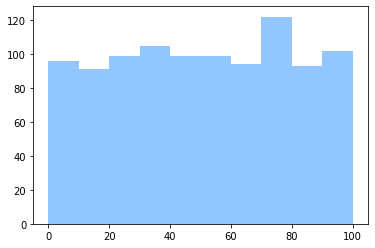

(array([463., 258., 114.,  80.,  39.,  23.,   9.,   5.,   4.,   5.]),
 array([8.31987377e-01, 2.41135348e+02, 4.81438709e+02, 7.21742070e+02,
        9.62045430e+02, 1.20234879e+03, 1.44265215e+03, 1.68295551e+03,
        1.92325887e+03, 2.16356223e+03, 2.40386559e+03]),
 <a list of 10 Patch objects>)

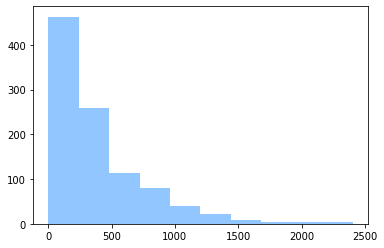

In [279]:
test=genarrs(1000)
testvecs=vecs(test[0],test[1],test[2])
mass=(testvecs[0]+testvecs[1]).m
plt.hist(mass)
plt.show()
pt=(testvecs[0]+testvecs[1]).p_t
plt.hist(pt)

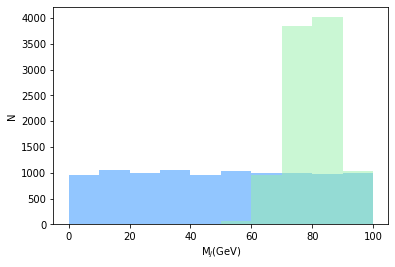

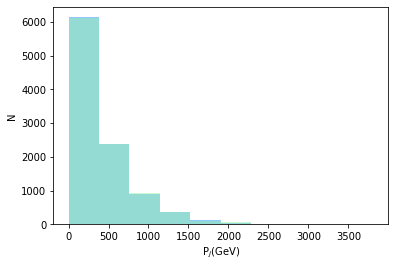

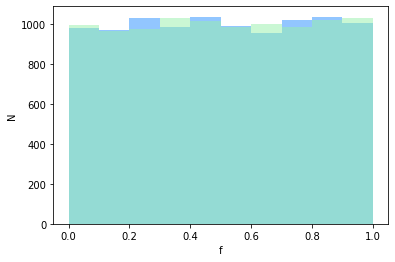

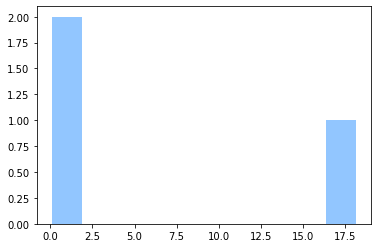

(array([1., 0., 0., 0., 0., 0., 1., 0., 0., 1.]),
 array([ 0.47797453,  2.95859646,  5.43921838,  7.9198403 , 10.40046222,
        12.88108415, 15.36170607, 17.84232799, 20.32294992, 22.80357184,
        25.28419376]),
 <a list of 10 Patch objects>)

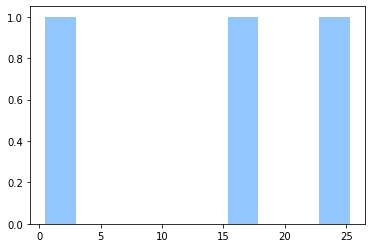

In [1291]:
testsig=genarrsSig(10000)
testbkg=genarrs(10000)
_,bins,_=plt.hist(testbkg[0])
plt.hist(testsig[0],alpha=0.5,bins=bins)
plt.xlabel("M$_{j}$(GeV)")
plt.ylabel("N")
plt.show()

_,bins,_=plt.hist(testbkg[1])
plt.hist(testsig[1],alpha=0.5,bins=bins)
plt.xlabel("P$_{j}$(GeV)")
plt.ylabel("N")
plt.show()

_,bins,_=plt.hist(testbkg[2])
plt.hist(testsig[2],alpha=0.5,bins=bins)
plt.xlabel("f")
plt.ylabel("N")
plt.show()


testvecssig=vecs(testsig[0],testsig[1],testsig[2])
testvecsbkg=vecs(testbkg[0],testbkg[1],testbkg[2])
mass=(testvecs[0]+testvecs[1]).m
plt.hist(mass)
plt.show()
pt=(testvecs[0]+testvecs[1]).p_t
plt.hist(pt)

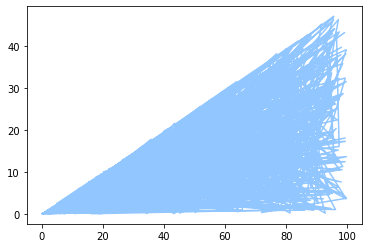

In [300]:
test=genarrsM(1000)
plt.plot(test[0],test[3])
#plt.hist(test[4])
plt.show()


check! 674.9196299281616 677.4464494842309 366.9199053906874 234.20299784783688
check! 1302.0291527900886 1307.1787021461566 401.172080383849 206.85802183579978
check! 1142.0846250437116 1146.2048216940061 452.0414870193918 187.64184823685193
check! 1739.3723740625278 1740.706847915688 370.2616103370318 156.1984300242886


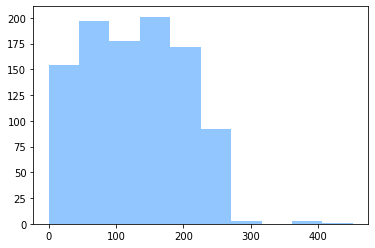

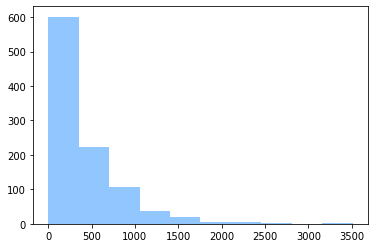

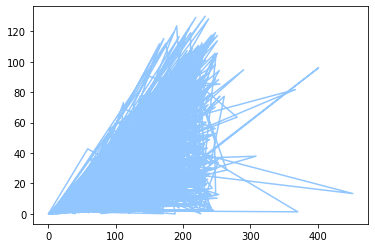

In [628]:
test=genarrsM(1000)
mass=np.array([])
pt=np.array([])
m1=np.array([])
for val in range(len(test[0])):
    lV1,lV2,lV3,lV4=vecs4(test[0][val],test[3][val],test[4][val],test[1][val],test[2][val])
    testvec=lV1+lV2+lV3+lV4
    m1=np.append(m1,(lV1+lV2).m)
    mass=np.append(mass,testvec.m)
    pt=np.append(pt,testvec.p_t)
    if testvec.m > 350:
        print("check!",testvec.p_t,test[1][val],testvec.m,test[0][val])
plt.hist(mass[mass < 1000])
plt.show()
plt.hist(pt)
plt.show()
plt.plot(mass,m1)
#plt.hist(test[4])
plt.show()


Now the challenge is to build an autoencoder that reproduces the input.

In [14]:
from scipy.stats import wasserstein_distance

In [145]:
wasserstein_distance(u_values=[1,0],v_values=[1,2],u_weights=[1,1],v_weights=[1,2])

1.1666666666666667

In [193]:
from pylorentz import Momentum4

In [224]:
muon = Momentum4.m_eta_phi_pt(10,0,0,100)
muon.e
print(np.pi)

3.141592653589793


In [388]:
from scipy.spatial.transform import Rotation as R

r = R.from_rotvec(0.3 * np.array([0, 1, 0]))
test=[1,0,0]
test=r.apply(test)
theta1  = np.arctan(test[2]/test[0])
print(theta1)

-0.3


In [533]:
print(np.arctan2(-1,-1)+np.pi)
np.arctan2(1,-1)
-0.36089129105944306 + 3.5747128728288895

0.7853981633974483


3.213821581769446

Net(
  (hidden): Linear(in_features=3, out_features=10, bias=True)
  (act): ReLU()
  (predict): Linear(in_features=10, out_features=1, bias=True)
  (output): Sigmoid()
)


/Users/pharris/Library/Python/3.7/lib/python/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([16000])) that is different to the input size (torch.Size([16000, 1])) is deprecated. Please ensure they have the same size.
  reduce (bool, optional): Deprecated (see :attr:`reduction`). By default, the


Finished Training
(4000,)
(4000,) [0. 0. 0. ... 1. 1. 1.] (4000,)


/Users/pharris/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass pos_label=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


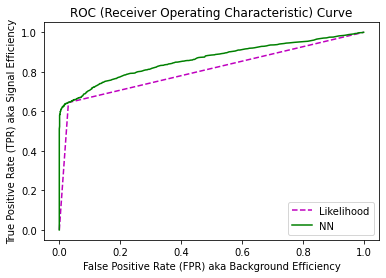

In [1304]:
#now lets do a quick training 
bkg=genarrs(10000)
sig=genarrsSig(10000)
bkg=np.swapaxes(np.vstack((bkg[0],bkg[1],bkg[2])),0,1)
sig=np.swapaxes(np.vstack((sig[0],sig[1],sig[2])),0,1)

#do the usual prep
from sklearn.model_selection import train_test_split
sig_train, sig_test, bkg_train, bkg_test = train_test_split(sig, bkg, test_size = 0.20, random_state = 5)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
sig_train = scaler.fit_transform(sig_train)
sig_test  = scaler.transform    (sig_test)
bkg_train = scaler.transform    (bkg_train)
bkg_test  = scaler.transform    (bkg_test)

#lets train a likelihood
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
likelihood = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
x_tmp = np.concatenate((sig_train, bkg_train))
y_tmp = np.hstack((np.zeros(len(sig_train)), np.ones(len(bkg_train))))
x_test_tmp = np.concatenate((sig_test, bkg_test))
y_test_tmp = np.hstack((np.zeros(len(sig_test)), np.ones(len(bkg_test))))

likelihood.fit(x_tmp, y_tmp)
likelihood_test = likelihood.predict(x_test_tmp)

#lets train an NN with these 3 inputs
import torch
import torch.nn.functional as F
from torch.autograd import Variable

# this is one way to define a network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden  = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.act     = torch.nn.ReLU()
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer
        self.output  = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.hidden(x)      # activation function for hidden layer
        x = self.act(x)
        x = self.predict(x)             # linear output
        x = self.output(x)
        return x

net = Net(n_feature=sig_train.shape[1], n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.003) 
x_tmp_torch = Variable(torch.from_numpy(x_tmp))
y_tmp_torch = Variable(torch.from_numpy(y_tmp))
for epoch in range(500):
    # zero the parameter gradients
    outputs = net(x_tmp_torch.float())
    loss = criterion(outputs, y_tmp_torch.float())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #print(loss.item())

print('Finished Training')
torch.save(net.state_dict(), 'model.pt')
x_tmp_test_torch = Variable(torch.from_numpy(x_test_tmp))
nn_test = (net(x_tmp_test_torch.float())).data.numpy()[:,0]
print(nn_test.shape)
#Lets plot the ROC of the two
def compute_ROC(labels, predicts, npts=1001):
    cutvals = np.linspace(0.,1.,num=npts)
    print(labels.shape,labels,predicts.shape)
    tot0 = float(len(labels[labels==0]))
    tot1 = float(len(labels[labels==1]))
    tpr = []
    fpr = []
    for c in cutvals:
        fpr.append(float(len(predicts[(labels==0) & (predicts>c)]))/tot0)
        tpr.append(float(len(predicts[(labels==1) & (predicts>c)]))/tot1)    
    return np.array(fpr),np.array(tpr)

#likelihood_rocpts = compute_ROC(y_test_tmp,likelihood_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test_tmp, likelihood_test,True)
likelihood_rocpts=np.vstack((fpr,tpr))
nn_rocpts         = compute_ROC(y_test_tmp,nn_test)

plt.plot(likelihood_rocpts[0],likelihood_rocpts[1],'m--',label="Likelihood")
plt.plot(nn_rocpts[0],        nn_rocpts[1],'g-',label="NN")
plt.title("ROC (Receiver Operating Characteristic) Curve")
plt.xlabel("False Positive Rate (FPR) aka Background Efficiency")
plt.ylabel("True Positive Rate (TPR) aka Signal Efficiency")
plt.legend(loc="lower right")
plt.show()



Net(
  (hidden): Linear(in_features=6, out_features=10, bias=True)
  (act): ReLU()
  (predict): Linear(in_features=10, out_features=1, bias=True)
  (output): Sigmoid()
)


/Users/pharris/Library/Python/3.7/lib/python/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([16000])) that is different to the input size (torch.Size([16000, 1])) is deprecated. Please ensure they have the same size.
  reduce (bool, optional): Deprecated (see :attr:`reduction`). By default, the


Finished Training
(4000,) [0. 0. 0. ... 1. 1. 1.] (4000,)


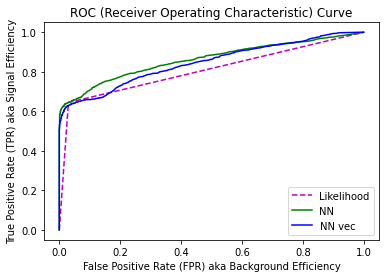

In [1324]:
#now lets train an NN with 2 particle inputs
bkg=np.swapaxes(bkg,0,1)
sig=np.swapaxes(sig,0,1)
bkgvecs=vecs(bkg[0],bkg[1],bkg[2])
sigvecs=vecs(sig[0],sig[1],sig[2])
bkgvecs=np.swapaxes(np.vstack((bkgvecs[0].p_x,bkgvecs[0].p_y,bkgvecs[0].p_z,bkgvecs[1].p_x,bkgvecs[1].p_y,bkgvecs[1].p_z)),0,1)
sigvecs=np.swapaxes(np.vstack((sigvecs[0].p_x,sigvecs[0].p_y,sigvecs[0].p_z,sigvecs[1].p_x,sigvecs[1].p_y,sigvecs[1].p_z)),0,1)
sig_train, sig_test, bkg_train, bkg_test = train_test_split(sigvecs, bkgvecs, test_size = 0.20, random_state = 5, shuffle = True)

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
sig_train = scaler.fit_transform(sig_train)
sig_test  = scaler.transform    (sig_test)
bkg_train = scaler.transform    (bkg_train)
bkg_test  = scaler.transform    (bkg_test)

x_tmp = np.concatenate((sig_train, bkg_train))
y_tmp = np.hstack((np.zeros(len(sig_train)), np.ones(len(bkg_train))))
x_test_tmp = np.concatenate((sig_test, bkg_test))
y_test_tmp = np.hstack((np.zeros(len(sig_test)), np.ones(len(bkg_test))))

#x_rand = np.random.permutation(len(x_tmp))
#x_tmp = x_tmp[x_rand]
#y_tmp = y_tmp[x_rand]

#x_test_rand = np.random.permutation(len(x_test_tmp))
#x_test_tmp = x_tmp[x_test_rand]
#y_test_tmp = y_tmp[x_test_rand]

net = Net(n_feature=sig_train.shape[1], n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.003) 
x_tmp_torch = Variable(torch.from_numpy(x_tmp))
y_tmp_torch = Variable(torch.from_numpy(y_tmp))
for epoch in range(500):
    # zero the parameter gradients
    outputs = net(x_tmp_torch.float())
    loss = criterion(outputs, y_tmp_torch.float())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #print(loss.item())

print('Finished Training')
torch.save(net.state_dict(), 'model.pt')
x_tmp_test_torch = Variable(torch.from_numpy(x_test_tmp))
nn_test_vec = (net(x_tmp_test_torch.float())).data.numpy()[:,0]
nn_vec_rocpts         = compute_ROC(y_test_tmp,nn_test_vec)

plt.plot(likelihood_rocpts[0],likelihood_rocpts[1],'m--',label="Likelihood")
plt.plot(nn_rocpts[0],        nn_rocpts[1],'g-',label="NN")
plt.plot(nn_vec_rocpts[0],        nn_rocpts[1],'b-',label="NN vec")
plt.title("ROC (Receiver Operating Characteristic) Curve")
plt.xlabel("False Positive Rate (FPR) aka Background Efficiency")
plt.ylabel("True Positive Rate (TPR) aka Signal Efficiency")
plt.legend(loc="lower right")
plt.show()

#now lets train a transformer



In [1007]:
from torch import nn, Tensor
import torch.nn.functional as F
from torch.nn import TransformerEncoder, TransformerEncoderLayer
from torch.utils.data import dataset

class TransformerModel(nn.Module):

    def __init__(self,ntoken: int, d_model: int, nhead: int, d_hid: int,
                 nlayers: int, dropout: float = 0.5):
        super().__init__()
        self.model_type = 'Transformer'
        print("d_model",d_model,"nhead",nhead,"dhid",d_hid,"nlayers",nlayers)
        #self.pos_encoder = PositionalEncoding(d_model, dropout)
        encoder_layers = TransformerEncoderLayer(d_model, nhead, d_hid, dropout)
        self.transformer_encoder = TransformerEncoder(encoder_layers, nlayers)
        self.d_model  = d_model  
        self.decoder1 = nn.Linear(d_model*2, 10)
        self.decoder2 = nn.Linear(10, ntoken)
        self.output   = torch.nn.Sigmoid()

    def forward(self, src: Tensor, src_mask: Tensor) -> Tensor:
        """
        Args:
            src: Tensor, shape [seq_len, batch_size]
            src_mask: Tensor, shape [seq_len, seq_len]

        Returns:
            output Tensor of shape [seq_len, batch_size, ntoken]
        """
        output = self.transformer_encoder(src, src_mask)
        output = output.permute(1,0,2)
        output = self.decoder1(output.flatten(1,2))
        output = self.decoder2(output)
        output = self.output(output)
        return output


def generate_square_subsequent_mask(sz: int) -> Tensor:
    """Generates an upper-triangular matrix of -inf, with zeros on diag."""
    return torch.triu(torch.ones(sz, sz) * float('-inf'), diagonal=1)


d_model 3 nhead 1 dhid 3 nlayers 2


/Users/pharris/Library/Python/3.7/lib/python/site-packages/torch/nn/modules/loss.py:498: UserWarning: Using a target size (torch.Size([16000])) that is different to the input size (torch.Size([16000, 1])) is deprecated. Please ensure they have the same size.
  reduce (bool, optional): Deprecated (see :attr:`reduction`). By default, the


(4000,) [0. 0. 0. ... 1. 1. 1.] (4000,)


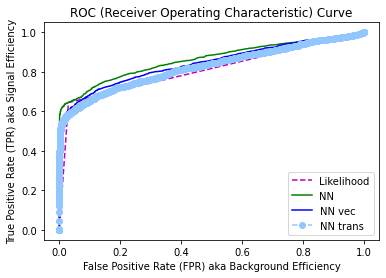

In [1312]:
bptt=2
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
src_mask = generate_square_subsequent_mask(bptt).to(device)
x_tmp_torch_out = x_tmp_torch.reshape(len(x_tmp_torch),2,3)
x_tmp_torch_out = x_tmp_torch_out.permute(1,0,2)

x_test_tmp_torch_out = x_tmp_test_torch.reshape(len(x_tmp_test_torch),2,3)
x_test_tmp_torch_out = x_test_tmp_torch_out.permute(1,0,2)


ntoken  = 1
emsize  = 3  # embedding dimension
d_hid   = 3  # dimension of the feedforward network model in nn.TransformerEncoder
nlayers = 2  # number of nn.TransformerEncoderLayer in nn.TransformerEncoder
nhead   = 1  # number of heads in nn.MultiheadAttention
dropout = 0.2  # dropout probability
model = TransformerModel(ntoken,emsize,nhead, d_hid, nlayers, dropout).to(device)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.003) 
model.train()  # turn on train mode
x_tmp_trans_test=x_tmp_torch_out[:,:].float()
#print(x_tmp_trans_test.shape)
#print(x_tmp_trans_test.permute(1,0,2).flatten(1,2).shape)
for epoch in range(500):
    # zero the parameter gradients
    outputs = model(x_tmp_trans_test,src_mask)
    #print(outputs.shape,y_tmp_torch.shape)
    loss = criterion(outputs, y_tmp_torch.float())
    optimizer.zero_grad()
    loss.backward()
    #torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
    optimizer.step()
    #print(loss.item())

#output = model(data, src_mask)
#loss = criterion(output.view(-1, ntokens), targets)
#optimizer.zero_grad()
#loss.backward()
#torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
#optimizer.step()

model.eval()
nn_test_trans_vec = (model(x_test_tmp_torch_out.float(),src_mask)).data.numpy()[:,0]
nn_trans_vec_rocpts         = compute_ROC(y_test_tmp,nn_test_trans_vec)

#rand_tensor = torch.rand((bptt,2,3))
#print(rand_tensor.shape)
#output = model(rand_tensor,src_mask)
#output = model(test,src_mask)
#output = model(test,src_mask)
#print("output",output.shape,output)

plt.plot(likelihood_rocpts[0],likelihood_rocpts[1],'m--',label="Likelihood")
plt.plot(nn_rocpts[0],          nn_rocpts[1],'g-',label="NN")
plt.plot(nn_vec_rocpts[0],      nn_vec_rocpts[1],'b-',label="NN vec")
plt.plot(nn_trans_vec_rocpts[0],nn_trans_vec_rocpts[1],'o--',label="NN trans")
plt.title("ROC (Receiver Operating Characteristic) Curve")
plt.xlabel("False Positive Rate (FPR) aka Background Efficiency")
plt.ylabel("True Positive Rate (TPR) aka Signal Efficiency")
plt.legend(loc="lower right")
plt.show()

(1, 4, 10000) (1, 4, 10000)
(1, 4, 10000) (2, 4, 10000)
(1, 4, 10000) (1, 4, 10000)
(1, 4, 10000) (2, 4, 10000)
(20000,) (20000,)
(20000,) (20000,)


/Users/pharris/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass pos_label=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


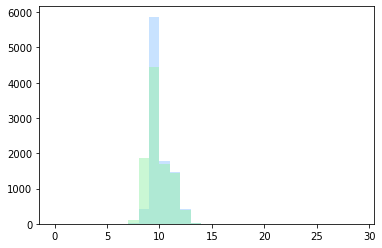

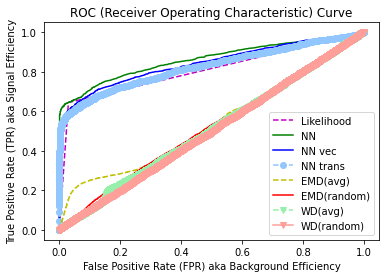

In [1315]:
import energyflow as ef
#Now lets compute the EMD 
#bkg=np.swapaxes(bkg,0,1)
#sig=np.swapaxes(sig,0,1)
bkgvecs=vecs(bkg[0],bkg[1],bkg[2])
sigvecs=vecs(sig[0],sig[1],sig[2])

#ev0=np.array([[1,0,0,1],[1,0,1,0]])
#ev1=np.array([[1,0,1,0],[10,0,1,1]])
#emd=ef.emd.emd(ev0, ev1, R=1, return_flow=True)
def prep(iVecs):
    testvec=np.array([])
    for pVal in range(len(iVecs)):
        fourvec=np.vstack((iVecs[pVal].e,iVecs[pVal].p_t,iVecs[pVal].eta,iVecs[pVal].phi))
        fourvec=fourvec.reshape(1,4,fourvec.shape[1])
        if pVal == 0: 
            testvec=fourvec
        else:
            testvec=np.vstack((testvec,fourvec))
        print(fourvec.shape,testvec.shape)
    testvec=np.swapaxes(np.swapaxes(testvec,0,2),1,2)
    return testvec

bkgvecs=prep(bkgvecs)
sigvecs=prep(sigvecs)
#bkgvecs=bkgvecs.reshape(10000,8)
#sigvecs=sigvecs.reshape(10000,8)
#scaler    = StandardScaler(copy=True, with_mean=False, with_std=True)
#sigvecs   = scaler.fit_transform(sigvecs)
#bkgvecs   = scaler.transform    (bkgvecs)
#sigvecs=sigvecs.reshape(10000,2,4)
#bkgvecs=bkgvecs.reshape(10000,2,4)


#print(bkgvecs[:,0].mean(),bkgvecs[:,1].mean(),bkgvecs[:,2].mean(),bkgvecs[:,3].mean())
bkgavg=np.array([])
for pVal0 in range(sigvecs.shape[1]):
    fourvec=np.array([])
    for pVal1 in range(sigvecs.shape[2]):
        fourvec=np.append(fourvec,bkgvecs[:,pVal0,pVal1].mean())
    if pVal0 == 0:
        bkgavg=fourvec
    else:
        bkgavg = np.vstack((bkgavg,fourvec))

bkgrdmid=np.random.permutation(len(bkgvecs))
bkgrdm=bkgvecs[bkgrdmid]

emds=np.array([])
emdsr=np.array([])
wds=np.array([])
wdsr=np.array([])
pVal=0
for pVec in sigvecs:
    emd=ef.emd.emd(pVec,bkgavg, R=1, return_flow=True)
    emdr=ef.emd.emd(pVec,bkgrdm[pVal], R=1, return_flow=True)
    wd = wasserstein_distance(u_values=pVec.flatten(),v_values=bkgavg.flatten())
    wdr= wasserstein_distance(u_values=pVec.flatten(),v_values=bkgrdm[pVal].flatten())
    emds  = np.append(emds,emd[0])
    emdsr = np.append(emdsr,emdr[0])
    wds  = np.append(wds,wd)
    wdsr = np.append(wdsr,wdr)
    pVal=pVal+1

emdb=np.array([])
emdbr=np.array([])
wdb=np.array([])
wdbr=np.array([])

pVal=0
for pVec in bkgvecs:
    emd=ef.emd.emd(pVec,bkgavg, R=1, return_flow=True)
    emdr=ef.emd.emd(pVec,bkgrdm[pVal], R=1, return_flow=True)
    wd = wasserstein_distance(u_values=pVec.flatten(),v_values=bkgavg.flatten())
    wdr= wasserstein_distance(u_values=pVec.flatten(),v_values=bkgrdm[pVal].flatten())
    emdb = np.append(emdb,emd[0])
    emdbr = np.append(emdbr,emdr[0])
    wdb  = np.append(wdb,wd)
    wdbr = np.append(wdbr,wdr)
    pVal=pVal+1
    
x_emd   = np.concatenate((emds,emdb))
x_emdr  = np.concatenate((emdsr,emdbr))

x_wd    = np.concatenate((wds,wdb))
x_wdr  =  np.concatenate((wdsr,wdbr))

y_emd   = np.hstack((np.zeros(len(emds)), np.ones(len(emdb))))

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_emd, -1.*x_emd,True)
emd_rocpts=np.vstack((fpr,tpr))

fpr, tpr, thresholds = metrics.roc_curve(y_emd, -1.*x_emdr,True)
emd_rocpts2=np.vstack((fpr,tpr))

print(x_wd.shape,y_emd.shape)
fpr, tpr, thresholds = metrics.roc_curve(y_emd, x_wd,True)
wd_rocpts=np.vstack((fpr,tpr))

print(x_wdr.shape,y_emd.shape)
fpr, tpr, thresholds = metrics.roc_curve(y_emd, x_wdr,True)
wd_rocpts2=np.vstack((fpr,tpr))


plt.hist(np.log(emds),bins=range(0,30,1),alpha=0.5)
plt.hist(np.log(emdb),bins=range(0,30,1),alpha=0.5)
plt.show()

#emd_rocpts2         = compute_ROC(y_emd,1-0.1*np.log(x_emd))

plt.plot(likelihood_rocpts[0],likelihood_rocpts[1],'m--',label="Likelihood")
plt.plot(nn_rocpts[0],          nn_rocpts[1],'g-',label="NN")
plt.plot(nn_vec_rocpts[0],      nn_vec_rocpts[1],'b-',label="NN vec")
plt.plot(nn_trans_vec_rocpts[0],nn_trans_vec_rocpts[1],'o--',label="NN trans")
plt.plot(emd_rocpts[0],emd_rocpts[1],'y--',label="EMD(avg)")
plt.plot(emd_rocpts2[0],emd_rocpts2[1],'r-',label="EMD(random)")
plt.plot(wd_rocpts[0],wd_rocpts[1],'v--',label="WD(avg)")
plt.plot(wd_rocpts2[0],wd_rocpts2[1],'v-',label="WD(random)")
plt.title("ROC (Receiver Operating Characteristic) Curve")
plt.xlabel("False Positive Rate (FPR) aka Background Efficiency")
plt.ylabel("True Positive Rate (TPR) aka Signal Efficiency")
plt.legend(loc="lower right")
plt.show()

[-3.71829823e+00 -4.48531982e-03  3.40226565e-03]


/Users/pharris/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass pos_label=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


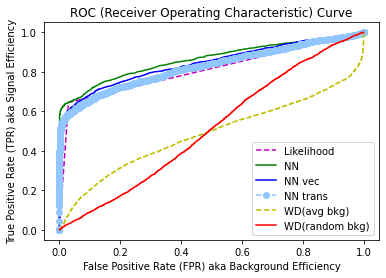

In [1320]:
#Now run 1D wasserstein
#sig=np.swapaxes(sig,0,1)
#bkg=np.swapaxes(bkg,0,1)
sig_train, sig_test, bkg_train, bkg_test = train_test_split(sig, bkg, test_size = 0.20, random_state = 5)

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
sig_train = scaler.fit_transform(sig_train)
sig_test  = scaler.transform    (sig_test)
bkg_train = scaler.transform    (bkg_train)
bkg_test  = scaler.transform    (bkg_test)

bkgavg=np.array([])
for pVal0 in range(sig_train.shape[1]):
    bkgavg = np.append(bkgavg,bkg_train[:,pVal0].mean())
print(bkgavg)
    
bkgrdmid=np.random.permutation(len(sig_train))
bkgrdm=bkg_train[bkgrdmid]

emds=np.array([])
emdsr=np.array([])
pVal=0
for pVec in sig_train:
    wd = wasserstein_distance(u_values=pVec,v_values=bkgavg)
    wdr= wasserstein_distance(u_values=pVec,v_values=bkgrdm[pVal])
    emds  = np.append(emds, wd)
    emdsr = np.append(emdsr,wdr)
    pVal=pVal+1
    
emdb=np.array([])
emdbr=np.array([])
pVal=0
for pVec in bkg_train:
    wd = wasserstein_distance(u_values=pVec,v_values=bkgavg)
    wdr= wasserstein_distance(u_values=pVec,v_values=bkgrdm[pVal])
    emdb = np.append(emdb,wd)
    emdbr = np.append(emdbr,wdr)
    pVal=pVal+1
    
x_emd   = np.concatenate((emds,emdb))
x_emdr  = np.concatenate((emdsr,emdbr))
y_emd   = np.hstack((np.zeros(len(emds)), np.ones(len(emdb))))

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_emd, x_emd,True)
emd_rocpts=np.vstack((fpr,tpr))

fpr, tpr, thresholds = metrics.roc_curve(y_emd, x_emdr,True)
emd_rocpts2=np.vstack((fpr,tpr))

plt.plot(likelihood_rocpts[0],likelihood_rocpts[1],'m--',label="Likelihood")
plt.plot(nn_rocpts[0],          nn_rocpts[1],'g-',label="NN")
plt.plot(nn_vec_rocpts[0],      nn_vec_rocpts[1],'b-',label="NN vec")
plt.plot(nn_trans_vec_rocpts[0],nn_trans_vec_rocpts[1],'o--',label="NN trans")
plt.plot(emd_rocpts[0],emd_rocpts[1],'y--',label="WD(avg bkg)")
plt.plot(emd_rocpts2[0],emd_rocpts2[1],'r-',label="WD(random bkg)")
plt.title("ROC (Receiver Operating Characteristic) Curve")
plt.xlabel("False Positive Rate (FPR) aka Background Efficiency")
plt.ylabel("True Positive Rate (TPR) aka Signal Efficiency")
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Now run 1D wasserstein
#sig=np.swapaxes(sig,0,1)
#bkg=np.swapaxes(bkg,0,1)
sig_train, sig_test, bkg_train, bkg_test = train_test_split(sig, bkg, test_size = 0.20, random_state = 5)

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
sig_train = scaler.fit_transform(sig_train)
sig_test  = scaler.transform    (sig_test)
bkg_train = scaler.transform    (bkg_train)
bkg_test  = scaler.transform    (bkg_test)

bkgavg=np.array([])
for pVal0 in range(sig_train.shape[1]):
    bkgavg = np.append(bkgavg,sig_train[:,pVal0].mean())
print(bkgavg)
    
bkgrdmid=np.random.permutation(len(sig_train))
bkgrdm=sig_train[bkgrdmid]

emds=np.array([])
emdsr=np.array([])
pVal=0
for pVec in sig_train:
    wd = wasserstein_distance(u_values=pVec,v_values=bkgavg)
    wdr= wasserstein_distance(u_values=pVec,v_values=bkgrdm[pVal])
    emds  = np.append(emds, wd)
    emdsr = np.append(emdsr,wdr)
    pVal=pVal+1
    
emdb=np.array([])
emdbr=np.array([])
pVal=0
for pVec in bkg_train:
    wd = wasserstein_distance(u_values=pVec,v_values=bkgavg)
    wdr= wasserstein_distance(u_values=pVec,v_values=bkgrdm[pVal])
    emdb = np.append(emdb,wd)
    emdbr = np.append(emdbr,wdr)
    pVal=pVal+1
    
x_emd   = np.concatenate((emds,emdb))
x_emdr  = np.concatenate((emdsr,emdbr))
y_emd   = np.hstack((np.zeros(len(emds)), np.ones(len(emdb))))

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_emd, x_emd,True)
emd_rocpts=np.vstack((fpr,tpr))

fpr, tpr, thresholds = metrics.roc_curve(y_emd, x_emdr,True)
emd_rocpts2=np.vstack((fpr,tpr))

plt.plot(likelihood_rocpts[0],likelihood_rocpts[1],'m--',label="Likelihood")
plt.plot(nn_rocpts[0],          nn_rocpts[1],'g-',label="NN")
plt.plot(nn_vec_rocpts[0],      nn_vec_rocpts[1],'b-',label="NN vec")
plt.plot(nn_trans_vec_rocpts[0],nn_trans_vec_rocpts[1],'o--',label="NN trans")
plt.plot(emd_rocpts[0],emd_rocpts[1],'y--',label="EMD(avg)")
plt.plot(emd_rocpts2[0],emd_rocpts2[1],'r-',label="EMD(random)")
plt.title("ROC (Receiver Operating Characteristic) Curve")
plt.xlabel("False Positive Rate (FPR) aka Background Efficiency")
plt.ylabel("True Positive Rate (TPR) aka Signal Efficiency")
plt.legend(loc="lower right")
plt.show()

0.02205493114888668
0.055797506123781204
(4000,) [0. 0. 0. ... 1. 1. 1.] (4000,)
(4000,) [0. 0. 0. ... 1. 1. 1.] (4000,)
(4000,) [0. 0. 0. ... 1. 1. 1.] (4000,)


/Users/pharris/Library/Python/3.7/lib/python/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  return ret


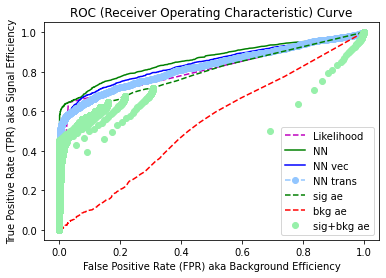

In [1326]:
#finally lets train an AE to do this, starting from particles
# this is one way to define a network
class AE(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_ae):
        super(AE, self).__init__()
        self.hidden1  = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.act1     = torch.nn.ReLU()
        self.latent   = torch.nn.Linear(n_hidden, n_ae)   # hidden layer
        self.act2     = torch.nn.ReLU()
        self.hidden2  = torch.nn.Linear(n_ae, n_hidden)   # hidden layer
        self.act3     = torch.nn.ReLU()
        self.predict  = torch.nn.Linear(n_hidden, n_feature)   # output layer
        
    def forward(self, x):
        x = self.hidden1(x)      # activation function for hidden layer
        x = self.act1(x)
        x = self.latent(x)          
        x = self.act2(x)            
        x = self.hidden2(x)
        x = self.act2(x)
        x = self.predict(x)
        return x

nae=3
sig_ae = AE(n_feature=sig_train.shape[1], n_hidden=10, n_ae=nae)     # define the network
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(sig_ae.parameters(), lr=0.003) 
sig_train_torch = Variable(torch.from_numpy(sig_train))
for epoch in range(1000):
    # zero the parameter gradients
    outputs = sig_ae(sig_train_torch.float())
    loss    = criterion(outputs, sig_train_torch.float())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #print(loss.item())
print(loss.item())

bkg_ae = AE(n_feature=bkg_train.shape[1], n_hidden=10, n_ae=nae)     # define the network
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(bkg_ae.parameters(), lr=0.003) 
bkg_train_torch = Variable(torch.from_numpy(bkg_train))
for epoch in range(1000):
    # zero the parameter gradients
    outputs = bkg_ae(bkg_train_torch.float())
    loss    = criterion(outputs, bkg_train_torch.float())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(loss.item())

criterion = torch.nn.MSELoss(reduce=False)
x_test_torch   = Variable(torch.from_numpy(x_test_tmp))
outputs        = sig_ae(x_test_torch.float())
loss_test      = criterion(outputs,x_test_torch.float())
loss_test1      = torch.sum(loss_test,axis=1).detach().numpy()
loss_sig_vec_rocpts         = compute_ROC(y_test_tmp,0.1*loss_test1)

outputs        = bkg_ae(x_test_torch.float())
loss_test      = criterion(outputs,x_test_torch.float())
loss_test2     = torch.sum(loss_test,axis=1).detach().numpy()
loss_bkg_vec_rocpts         = compute_ROC(y_test_tmp,0.1*loss_test2)

#Lets plot the ROC of the two
def compute_ROC2D(labels, predicts1, predicts2, npts=201):
    cutvals = np.linspace(0.,1.,num=npts)
    print(labels.shape,labels,predicts1.shape)
    tot0 = float(len(labels[labels==0]))
    tot1 = float(len(labels[labels==1]))
    tpr = []
    fpr = []
    for c1 in cutvals:
        for c2 in cutvals:
            fpr.append(float(len(predicts1[(labels==0) & (predicts1>c1) & (predicts1<c2)]))/tot0)
            tpr.append(float(len(predicts1[(labels==1) & (predicts1>c1) & (predicts2<c2)]))/tot1)    
    return np.array(fpr),np.array(tpr)



loss_vec_rocpts             = compute_ROC2D(y_test_tmp,0.1*loss_test1,0.1*loss_test2)


plt.plot(likelihood_rocpts[0],likelihood_rocpts[1],'m--',label="Likelihood")
plt.plot(nn_rocpts[0],          nn_rocpts[1],'g-',label="NN")
plt.plot(nn_vec_rocpts[0],      nn_vec_rocpts[1],'b-',label="NN vec")
plt.plot(nn_trans_vec_rocpts[0],nn_trans_vec_rocpts[1],'o--',label="NN trans")
plt.plot(loss_sig_vec_rocpts[0],    loss_sig_vec_rocpts[1],'g--',label="sig ae")
plt.plot(loss_bkg_vec_rocpts[0],    loss_bkg_vec_rocpts[1],'r--',label="bkg ae")
plt.plot(loss_vec_rocpts[0],        loss_vec_rocpts[1]    ,'o',label="sig+bkg ae")
plt.title("ROC (Receiver Operating Characteristic) Curve")
plt.xlabel("False Positive Rate (FPR) aka Background Efficiency")
plt.ylabel("True Positive Rate (TPR) aka Signal Efficiency")
plt.legend(loc="lower right")
plt.show()

In [996]:
bkgvecs=vecs(bkg[0],bkg[1],bkg[2])
mass=(bkgvecs[0]+bkgvecs[1]).m
bkgvecs_out=np.swapaxes(np.vstack((bkgvecs[0].p_x,bkgvecs[0].p_y,bkgvecs[0].p_z,bkgvecs[1].p_x,bkgvecs[1].p_y,bkgvecs[1].p_z)),0,1)
bkg_input  = scaler.transform    (bkgvec_out)
bkg_input  = Variable(torch.from_numpy(bkg_input))
nn_input   = (net(bkg_input.float())).data.numpy()[:,0]
#bkg_input  = bkg_input.reshape(len(bkg_input),2,3)
#bkg_input  = bkg_input.permute(1,0,2)
#sigvecs=vecs(sig[0],sig[1],sig[2])

plt.plot(mass,nn_input)


3


NameError: name 'a' is not defined